In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
dataset_train = pd.read_csv('C:\\Users\\anike\\Downloads\\RNN dataset\\Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = dataset_train.iloc[:, 1: 2].values

In [8]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [9]:
training_set.shape


(1258, 1)

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [11]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [15]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
 X_train.append(training_set_scaled[i-60: i, 0])
 y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((1198, 60), (1198,))

In [19]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

In this case, it reshapes X_train to have three dimensions:
The first dimension is the number of samples/examples.
The second dimension is the length of each input sequence (which is 60 in your case).
The third dimension is set to 1, indicating that each element in the sequence is a single value.

(1198, 60, 1)

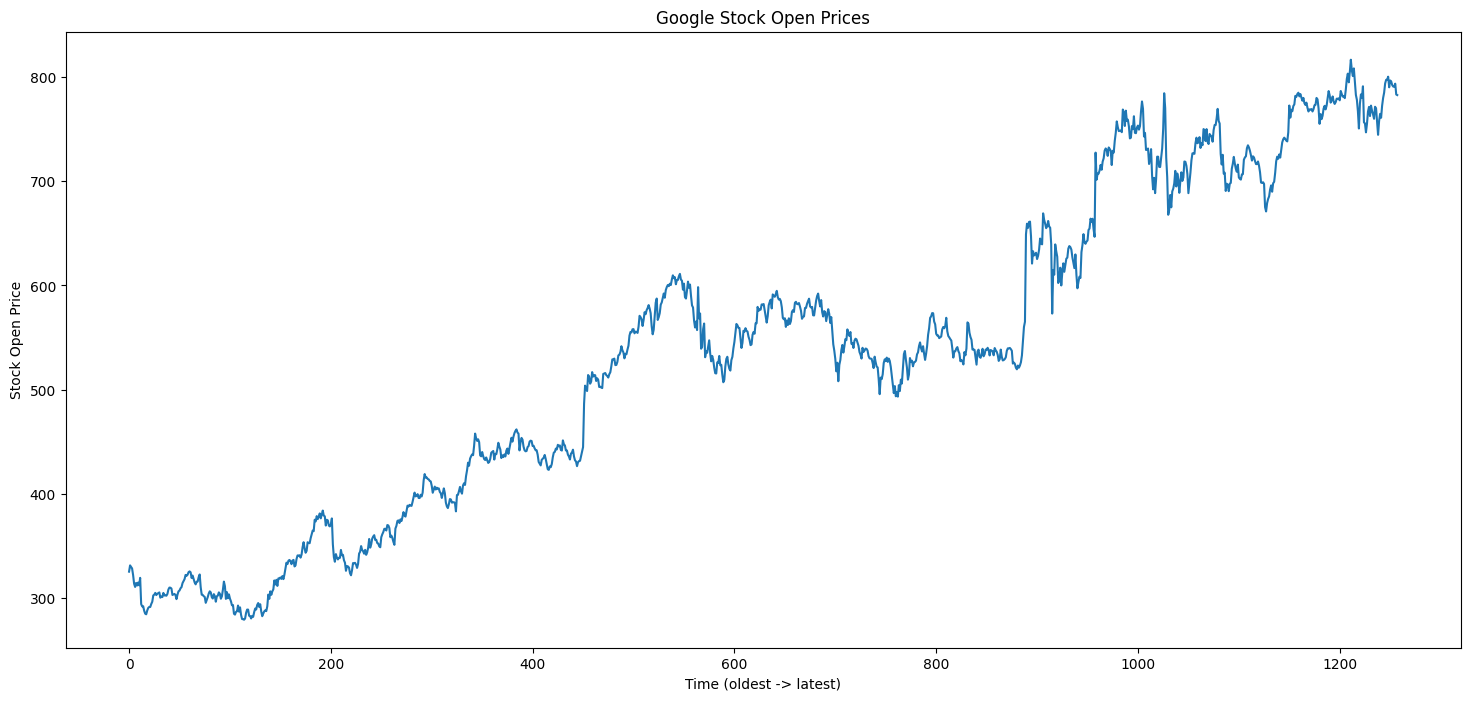

In [21]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()


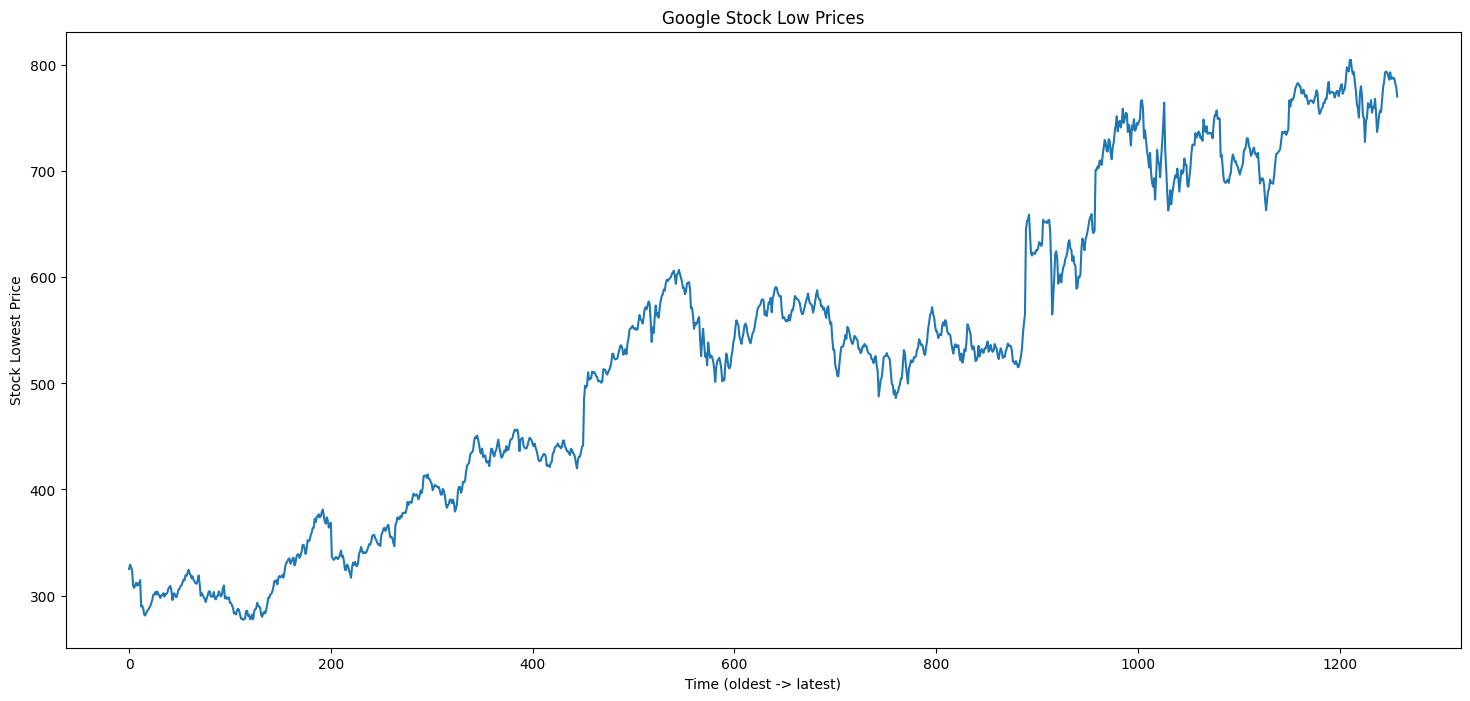

In [22]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

In [23]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))
##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))
##add output layer
regressor.add(Dense(units = 1))


In [24]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [26]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 10)

Epoch 1/10
38/38 [==============================] - 11s 96ms/step - loss: 0.0471
Epoch 2/10
38/38 [==============================] - 5s 126ms/step - loss: 0.0073
Epoch 3/10
38/38 [==============================] - 4s 98ms/step - loss: 0.0057
Epoch 4/10
38/38 [==============================] - 4s 103ms/step - loss: 0.0056
Epoch 5/10
38/38 [==============================] - 4s 106ms/step - loss: 0.0052
Epoch 6/10
38/38 [==============================] - 7s 179ms/step - loss: 0.0054
Epoch 7/10
38/38 [==============================] - 6s 158ms/step - loss: 0.0049
Epoch 8/10
38/38 [==============================] - 4s 114ms/step - loss: 0.0049
Epoch 9/10
38/38 [==============================] - 6s 145ms/step - loss: 0.0048
Epoch 10/10
38/38 [==============================] - 5s 131ms/step - loss: 0.0049


In [27]:
dataset_test = pd.read_csv('C:\\Users\\anike\\Downloads\\RNN dataset\\Google_Stock_Price_Test.csv')

In [28]:
dataset_test.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [29]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(20, 1)

In [30]:

#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
 axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


In [31]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)
#scale input
inputs = sc.transform(inputs)

In [32]:
len(inputs)

80

In [35]:
X_test = []
for i in range(60, len(inputs)):
 X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape


(20, 60, 1)

In [36]:

predicted_stock_price = regressor.predict(X_test)


1/1 [==============================] - 3s 3s/step


In [38]:
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

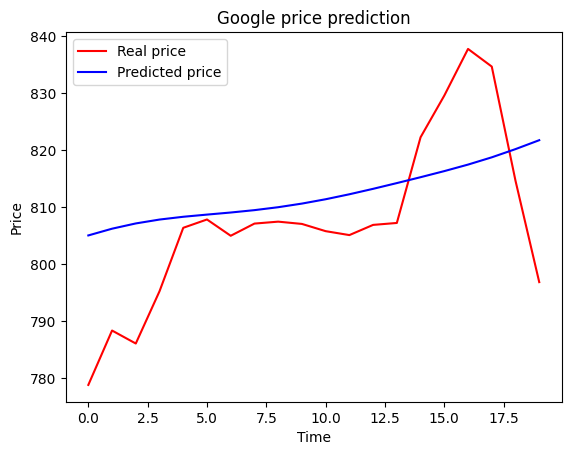

In [39]:
#visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()